In [ ]:
# Clustering for collaborative recommendations
# input file - Survey Data
# output file - Cluster mapping - json, cluster aggregates- csv

In [1]:
import pandas as pd
import numpy as np
import io
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn
from pprint import pprint
np.random.seed(sum(map(ord, "aesthetics")))
seaborn.set_context('notebook')
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
#from google.colab import files
#uploaded = files.upload()

Saving Survey output_v4.xlsx to Survey output_v4.xlsx


In [5]:
df = pd.read_json('Survey Data.json')
print(df.shape)
df.head()

(96, 14)


,ID,Email,Name,Name2,Age,Height,Weight (kg),Gender,Location (state),Favorite cuisine,Preferred food type,Diets current followed,"Current or past allergies, if any",Current ailments if any
0,0,Avnika_Rastogi_AMPBA2022S@isb.edu,Avnika Rastogi,None,32,62.0,68,Female,Maharashtra,Chinese or other Asian ;,Non-vegetarian,Low-carb,Soya;,PCOD;Anemia;
1,1,Lakshmi_Yechuri_AMPBA2022S@isb.edu,Lakshmi Harshitha Yechuri,Lakshmi,26,64.0,60,Female,Andhra Pradesh,Italian;,Vegetarian,None,None;,None;
2,2,Simantini_Ghosh_AMPBA2022S@isb.edu,Simantini Ghosh,Simantini Ghosh,35,63.0,61,Female,Assam,Continental;,Vegetarian,None,None;,None;
3,3,Shephali_Bhardwaj_AMPBA2022S@isb.edu,Shephali Bhardwaj,None,35,64.8,70,Female,Rajasthan,Italian;Continental;,Vegetarian,None,None;,None;
4,4,Gaurav_Anand_AMPBA2022S@isb.edu,Gaurav Kumar Anand,Gaurav Anand,37,70.0,78,Male,Karnataka,Indian ;Italian;,Eggitarian,None,None;,None;


In [6]:
df['Favorite cuisine'] = df['Favorite cuisine'].str.rstrip(';')
df['Current or past allergies, if any'] = df['Current or past allergies, if any'].str.rstrip(';')
df['Current ailments if any'] = df['Current ailments if any'].str.rstrip(';')
df['Diets current followed'] = df['Diets current followed'].str.rstrip(';')
df['Preferred food type'] = df['Preferred food type'].str.rstrip(';')

In [7]:
# Separate the data into three dataframes: One with quantitative data, one with categorical data from single-select qns, and one with categorical data from multi-select qns

quant = df.iloc[:,4:7] #quantiative data
#quant = quant.reset_index()
cat = df.drop(df.columns[[1,2,3,4,5,6]],axis=1) #all categorical data
cat_single = cat
#cat_single.head(4)

In [8]:
cat_final = cat_single.drop(cat_single.columns[[0,2,3,6,7]], axis=1) #Categorical data for single-select qns
cat_dummies = pd.DataFrame(pd.get_dummies(cat_final))
#cat_dummies.head()

In [9]:
df_Cuisine = cat.drop(cat.columns[[1,2,4,5,6,7]], axis=1) 
df_Cuisine.head(2)

#Split multiple options into multiple columns for the same row (user)
df_Cuisine['Cuisine'] = df_Cuisine["Favorite cuisine"].apply(lambda x: x.split(';'))
df_Cuisine = df_Cuisine.explode('Cuisine')

df_Cuisine = df_Cuisine.drop(df_Cuisine.columns[[1]], axis=1)
df_Cuisine['Cuisine'].str.rstrip()
df_Cuisine['Cuisine'].str.lstrip()

df_Cuisine = pd.DataFrame(pd.get_dummies(data = df_Cuisine, columns=['Cuisine'], prefix = None, prefix_sep = "_"))
print(df_Cuisine.shape)

Cuisine = df_Cuisine.groupby('ID').sum()
Cuisine.tail(5)

(191, 10)


,Cuisine_Arabic,Cuisine_Chinese or other Asian,Cuisine_Continental,Cuisine_Indian,Cuisine_Italian,Cuisine_Mediterranean,Cuisine_Mexican,Cuisine_Other,Cuisine_Thai
ID,,,,,,,,,
91,0,1,0,1,0,0,0,0,0
92,0,0,0,1,0,0,0,0,0
93,0,1,0,1,0,0,1,0,1
94,0,0,0,1,0,0,0,0,0
95,0,0,0,1,1,0,0,0,0


In [10]:
df_Allergy = cat.drop(cat.columns[[1,2,3,4,5,7]], axis=1) 
df_Allergy.head(2)

#Split multiple options into multiple columns for the same row (user)
df_Allergy['Allergy'] = df_Allergy["Current or past allergies, if any"].apply(lambda x: x.split(';'))
df_Allergy = df_Allergy.explode('Allergy')

df_Allergy = df_Allergy.drop(df_Allergy.columns[[1]], axis=1)
df_Allergy['Allergy'].str.rstrip()
df_Allergy['Allergy'].str.lstrip()

df_Allergy = pd.DataFrame(pd.get_dummies(data = df_Allergy, columns=['Allergy'], prefix = None, prefix_sep = "_"))
print(df_Allergy.shape)

Allergy = df_Allergy.groupby('ID').sum()
Allergy.head(4)

(102, 13)


,Allergy_Brinjal,Allergy_Capsicum,Allergy_Dairy,Allergy_Dust,Allergy_Guava,Allergy_Mushroom,Allergy_None,Allergy_Nuts,Allergy_Others,Allergy_Seafood,Allergy_Shell fish,Allergy_Soya
ID,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0


In [11]:
df_Ailment = cat.drop(cat.columns[[1,2,3,4,5,6]], axis=1) 
df_Ailment.head(2)

#Split multiple options into multiple columns for the same row (user)
df_Ailment['Ailment'] = df_Ailment["Current ailments if any"].apply(lambda x: x.split(';'))
df_Ailment = df_Ailment.explode('Ailment')

df_Ailment = df_Ailment.drop(df_Ailment.columns[[1]], axis=1)
df_Ailment['Ailment'].str.rstrip()
df_Ailment['Ailment'].str.lstrip()

df_Ailment = pd.DataFrame(pd.get_dummies(data = df_Ailment, columns=['Ailment'], prefix = None, prefix_sep = "_"))
print(df_Ailment.shape)

Ailment = df_Ailment.groupby('ID').sum()
Ailment.head(5)

(99, 10)


,Ailment_Anemia,Ailment_Asthama,Ailment_Blood pressure,Ailment_Diabetes,Ailment_Heart-related ailments,Ailment_None,Ailment_Obesity,Ailment_PCOD,Ailment_Thyroid ailments
ID,,,,,,,,,
0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,1,0,0,0


In [12]:
data_original = pd.concat([quant,cat_dummies,Cuisine,Allergy,Ailment],axis=1)
data_ml = pd.concat([quant,cat_dummies,Cuisine,Allergy,Ailment],axis=1)
data_ml[['Age', 'Height','Weight (kg)']] = StandardScaler().fit_transform(data_ml[['Age', 'Height','Weight (kg)']])
print(data_ml.shape)
print(data_original.shape)
data_ml.head(70)

(96, 46)
(96, 46)


,Age,Height,Weight (kg),Gender_Female,Gender_Male,Preferred food type_Eggitarian,Preferred food type_No specific preference,Preferred food type_Non-vegetarian,Preferred food type_Vegetarian,Diets current followed_Gluten-free,...,Allergy_Soya,Ailment_Anemia,Ailment_Asthama,Ailment_Blood pressure,Ailment_Diabetes,Ailment_Heart-related ailments,Ailment_None,Ailment_Obesity,Ailment_PCOD,Ailment_Thyroid ailments
0,0.158352,-0.759208,0.061785,1,0,0,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0
1,-0.475057,-0.275504,-0.453988,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,0.475057,-0.517356,-0.389516,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.475057,-0.082023,0.190729,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0.686193,1.175606,0.706502,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,-0.369489,1.078866,0.577559,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
66,-0.686193,-1.242912,-0.196101,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
67,-0.791762,-0.662467,-0.260573,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
68,-0.791762,-1.242912,-1.098704,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


C:\Users\91886\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


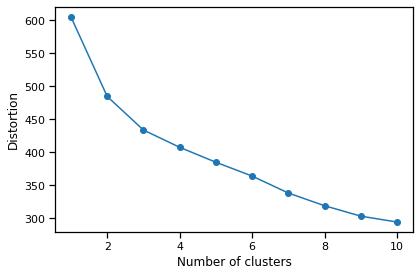

In [13]:
distortions = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    kmeans.fit(data_ml)
    distortions.append(kmeans.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

In [14]:
kmeans = KMeans(n_clusters = 3,init='random',n_init =10,max_iter=300)
print(kmeans.fit(data_ml))

y_pred = kmeans.predict(data_ml)
print(y_pred)
data_original['cluster'] = y_pred
data_original.reset_index(inplace = True)
data_original = data_original.rename(columns={data_original.columns[0]: 'User_ID'})
data_original.tail(5)

#df2 = data_original.groupby('cluster').agg(['mean'])
#df2

KMeans(init='random', n_clusters=3)
[0 0 2 2 1 1 1 1 2 1 1 1 2 0 2 2 2 2 0 1 0 2 0 1 2 1 2 1 2 2 0 2 0 1 1 1 0
 0 1 2 2 1 1 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 2 2 1 1 1
 1 0 1 0 1 0 0 1 0 0 0 0 1 0 1 1 0 1 1 2 0 0]


,User_ID,Age,Height,Weight (kg),Gender_Female,Gender_Male,Preferred food type_Eggitarian,Preferred food type_No specific preference,Preferred food type_Non-vegetarian,Preferred food type_Vegetarian,...,Ailment_Anemia,Ailment_Asthama,Ailment_Blood pressure,Ailment_Diabetes,Ailment_Heart-related ailments,Ailment_None,Ailment_Obesity,Ailment_PCOD,Ailment_Thyroid ailments,cluster
91,91,16,68.0,51,0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
92,92,24,67.0,73,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
93,93,44,65.0,70,0,1,0,0,1,0,...,1,0,0,0,0,0,0,1,0,2
94,94,30,62.4,65,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
95,95,24,66.0,47,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [15]:
df3 = data_original.groupby('cluster').agg('mean')
#df3.to_excel("output_file_cluster_means.xlsx")
df3

,User_ID,Age,Height,Weight (kg),Gender_Female,Gender_Male,Preferred food type_Eggitarian,Preferred food type_No specific preference,Preferred food type_Non-vegetarian,Preferred food type_Vegetarian,...,Allergy_Soya,Ailment_Anemia,Ailment_Asthama,Ailment_Blood pressure,Ailment_Diabetes,Ailment_Heart-related ailments,Ailment_None,Ailment_Obesity,Ailment_PCOD,Ailment_Thyroid ailments
cluster,,,,,,,,,,,,,,,,,,,,,
0,55.891892,25.594595,62.063784,57.567568,0.972973,0.027027,0.027027,0.108108,0.513514,0.351351,...,0.054054,0.054054,0.027027,0.027027,0.000,0.000000,0.621622,0.000000,0.270270,0.027027
1,48.375000,29.325000,68.683450,77.550000,0.125000,0.875000,0.100000,0.075000,0.500000,0.325000,...,0.025000,0.000000,0.000000,0.025000,0.025,0.000000,0.875000,0.050000,0.025000,0.025000
2,29.315789,42.526316,63.666316,63.368421,0.842105,0.157895,0.000000,0.368421,0.052632,0.578947,...,0.000000,0.052632,0.000000,0.157895,0.000,0.052632,0.473684,0.052632,0.105263,0.157895


In [17]:
data_original.to_json('Clustered Mapping.json') 
#files.download('Clustered_Data.csv')

In [18]:
df3.to_csv('cluster aggregates.csv') 
#files.download('clusters.csv')